In [79]:
import pandas as pd

# 读取 Titanic.csv 文件
df = pd.read_csv('Titanic.csv')

# 随机抽取80%的数据
train = df.sample(frac=0.8, random_state=123)

# 将抽取的数据保存到 train.csv 文件中
train.to_csv('train.csv', index=False)

In [80]:
# 查看前五行数据
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C


In [81]:
# 查看后五行数据
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,NaN,S
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C


In [1]:
# 读取 Titanic.csv 文件
df = pd.read_csv('train.csv')

# 检测缺失值
missing_values = df.isnull().sum()

# 输出各字段的缺失值数量，其中Age、Cabin、Embarked存在缺失值
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            139
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          555
Embarked         1
dtype: int64


In [2]:
# 对上述存在缺失值的字段进行填补
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [3]:
# 检测重复值
duplicate_rows = df.duplicated()
duplicate_rows_count = duplicate_rows.sum()
print("重复行数:", duplicate_rows_count)

重复行数: 0


In [4]:
# 降重(因为重复行数为0，所以无需降重)
# df.drop_duplicates(inplace=True)

In [5]:
# 基本统计分析(包含数量、均值、方差、最小值、最大值等)
statistics = df.describe()
print(statistics)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   713.000000  713.000000  713.000000  713.000000  713.000000   
mean    451.237027    0.366059    2.312763   29.422613    0.507714   
std     257.904310    0.482064    0.834015   12.728972    1.086309   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     228.000000    0.000000    2.000000   22.000000    0.000000   
50%     455.000000    0.000000    3.000000   29.422613    0.000000   
75%     677.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   74.000000    8.000000   

            Parch        Fare  
count  713.000000  713.000000  
mean     0.360449   31.026296  
std      0.781065   47.260244  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   13.862500  
75%      0.000000   30.500000  
max      6.000000  512.329200  


In [6]:
# 【分析一】海难发生前，一等舱有 XX 人，二等舱 XX 人，三等舱 XX 人，分别占总人数的 XX%，XX%，XX%

In [11]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 统计海难发生前不同舱位的乘客人数
first_class_count = df[df['Pclass'] == 1]['PassengerId'].count()
second_class_count = df[df['Pclass'] == 2]['PassengerId'].count()
third_class_count = df[df['Pclass'] == 3]['PassengerId'].count()

# 计算不同舱位的乘客人数占总人数的比例，并保留2位小数
total_passengers = df['PassengerId'].count()
first_class_percent = round((first_class_count / total_passengers) * 100, 2)
second_class_percent = round((second_class_count / total_passengers) * 100, 2)
third_class_percent = round((third_class_count / total_passengers) * 100, 2)

# 打印结果
print(f"一等舱人数：{first_class_count}")
print(f"二等舱人数：{second_class_count}")
print(f"三等舱人数：{third_class_count}")
print(f"一等舱乘客占比：{first_class_percent}%")
print(f"二等舱乘客占比：{second_class_percent}%")
print(f"三等舱乘客占比：{third_class_percent}%")

一等舱人数：171
二等舱人数：148
三等舱人数：394
一等舱乘客占比：23.98%
二等舱乘客占比：20.76%
三等舱乘客占比：55.26%


In [ ]:
# 【分析一的结论】
# 一等舱人数：171
# 二等舱人数：148
# 三等舱人数：394
# 一等舱乘客占比：23.98%
# 二等舱乘客占比：20.76%
# 三等舱乘客占比：55.26%

In [12]:
# 【分析二】海难发生后，一等舱、二等舱、三等舱的乘客人数剩余 XX、XX、XX 人，分别占总人数的 XX%，XX%，XX%

In [20]:
# 读取 Titanic.csv 文件
df = pd.read_csv('train.csv')

# 统计海难发生后不同舱位的乘客人数
first_class_survived = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]['PassengerId'].count()
second_class_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]['PassengerId'].count()
third_class_survived = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]['PassengerId'].count()

# 计算不同舱位的乘客人数占总人数的比例，并保留2位小数
total_passengers_survived = df[df['Survived'] == 1]['PassengerId'].count()
first_class_percent_survived = round((first_class_survived / total_passengers_survived) * 100, 2)
second_class_percent_survived = round((second_class_survived / total_passengers_survived) * 100, 2)
third_class_percent_survived = round((third_class_survived / total_passengers_survived) * 100, 2)

# 打印结果
print(f"海难发生后，一等舱乘客剩余人数： {first_class_survived}")
print(f"海难发生后，二等舱乘客剩余人数： {second_class_survived}")
print(f"海难发生后，三等舱乘客剩余人数： {third_class_survived}")
print(f"海难发生后，一等舱乘客占比： {first_class_percent_survived}%")
print(f"海难发生后，二等舱乘客占比： {second_class_percent_survived}%")
print(f"海难发生后，三等舱乘客占比： {third_class_percent_survived}%")

海难发生后，一等舱乘客剩余人数： 106
海难发生后，二等舱乘客剩余人数： 65
海难发生后，三等舱乘客剩余人数： 90
海难发生后，一等舱乘客占比： 40.61%
海难发生后，二等舱乘客占比： 24.9%
海难发生后，三等舱乘客占比： 34.48%


In [ ]:
# 【分析二的结论】
# 海难发生后，一等舱乘客剩余人数： 106
# 海难发生后，二等舱乘客剩余人数： 65
# 海难发生后，三等舱乘客剩余人数： 90
# 海难发生后，一等舱乘客占比： 40.61%
# 海难发生后，二等舱乘客占比： 24.9%
# 海难发生后，三等舱乘客占比： 34.48%

In [14]:
# 【分析三】一等舱生还率为 XX%，二等舱为 XX%，三等舱为 XX%。

In [22]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 统计不同舱位的乘客人数
first_class_total = df[df['Pclass'] == 1]['PassengerId'].count()
second_class_total = df[df['Pclass'] == 2]['PassengerId'].count()
third_class_total = df[df['Pclass'] == 3]['PassengerId'].count()

# 统计不同舱位生还的乘客人数
first_class_survived = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]['PassengerId'].count()
second_class_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]['PassengerId'].count()
third_class_survived = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]['PassengerId'].count()

# 计算不同舱位的生还率，并保留两位小数
first_class_percent_survived = round((first_class_survived / first_class_total) * 100, 2)
second_class_percent_survived = round((second_class_survived / second_class_total) * 100, 2)
third_class_percent_survived = round((third_class_survived / third_class_total) * 100, 2)

# 打印结果
print(f"一等舱生还率为 {first_class_percent_survived}%")
print(f"二等舱生还率为 {second_class_percent_survived}%")
print(f"三等舱生还率为 {third_class_percent_survived}%")

一等舱生还率为 61.99%
二等舱生还率为 43.92%
三等舱生还率为 22.84%


In [67]:
# 【分析三的结论】
# 一等舱生还率为 61.99%
# 二等舱生还率为 43.92%
# 三等舱生还率为 22.84%
# 可见客舱等级越高，生还率越高。

In [ ]:
# 【分析三的可视化】使用柱状图表示不同舱位的生还率

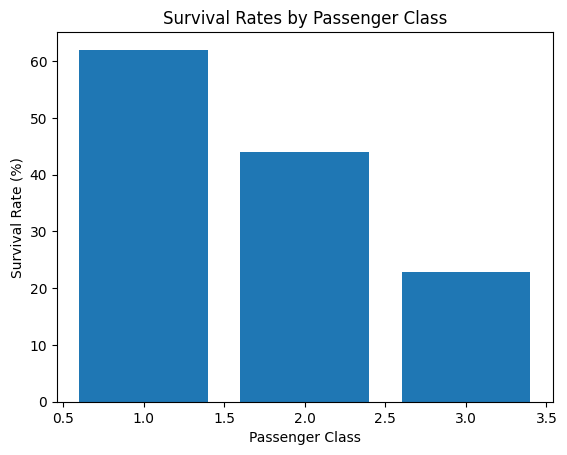

In [68]:
import matplotlib.pyplot as plt

# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 统计不同舱位的乘客人数
class_counts = df['Pclass'].value_counts(sort=False)

# 统计不同舱位生还的乘客人数
survived_counts = df[df['Survived'] == 1]['Pclass'].value_counts(sort=False)

# 计算不同舱位的生还率，并保留两位小数
survival_rates = round((survived_counts / class_counts) * 100, 2)

# 创建柱状图
plt.bar(survival_rates.index, survival_rates.values)

# 设置图表标题和标签
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')

# 显示图表
plt.show()

In [19]:
# 【分析三的可视化】使用饼图表示不同舱位的生还率

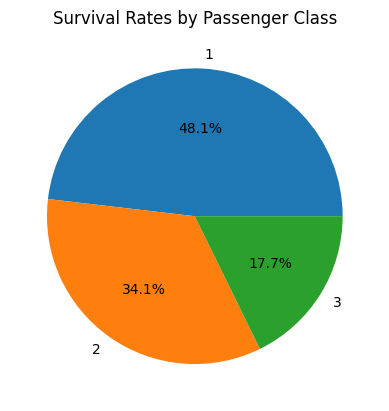

In [69]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 统计不同舱位的乘客人数
class_counts = df['Pclass'].value_counts(sort=False)

# 统计不同舱位生还的乘客人数
survived_counts = df[df['Survived'] == 1]['Pclass'].value_counts(sort=False)

# 计算不同舱位的生还率，并保留两位小数
survival_rates = round((survived_counts / class_counts) * 100, 2)

# 创建饼图
plt.pie(survival_rates, labels=survival_rates.index, autopct='%1.1f%%')

# 设置图表标题
plt.title('Survival Rates by Passenger Class')

# 显示图表
plt.show()

In [70]:
# 【分析四】乘客的性别与生还率关系

In [55]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 计算不同性别的生还人数
survived_counts = df[df['Survived'] == 1]['Sex'].value_counts()
total_counts = df['Sex'].value_counts()

# 计算不同性别的生还率
survival_rates = round((survived_counts / total_counts) * 100, 2)

survival_rates

Sex
female    72.13
male      18.12
Name: count, dtype: float64

In [ ]:
# 【分析四的结论】：男性和女性乘客生还率如下：男性的生还率为18.12%，女性的生还率为72.13%，女性乘客可能更容易生还。

In [ ]:
# 【分析四的可视化】使用柱状图表示乘客的性别与生还率关系

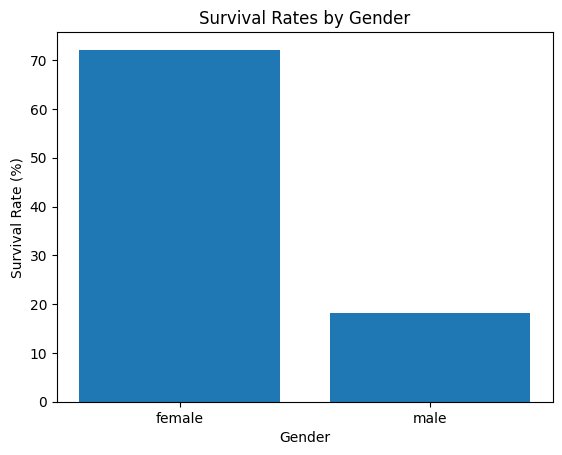

In [56]:
# 创建柱状图
plt.bar(survival_rates.index, survival_rates.values)

# 设置图表标题和标签
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')

# 显示图表
plt.show()

In [34]:
# 【分析五】年龄与生还率关系

In [60]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 删除年龄缺失值的行
df.dropna(subset=['Age'], inplace=True)

# 分割年龄为年龄段
bins = [0, 12, 18, 65, 100]
labels = ['Children', 'Teenager', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 计算不同年龄段的生还人数
survived_counts = df[df['Survived'] == 1]['AgeGroup'].value_counts()
total_counts = df['AgeGroup'].value_counts()

# 计算不同年龄段的生还率
survival_rates = round((survived_counts / total_counts) * 100, 2)

survival_rates

AgeGroup
Adult       36.27
Children    55.56
Teenager    47.22
Elderly      0.00
Name: count, dtype: float64

In [61]:
# 【分析五的结论】：根据年龄段进行分类，不同年龄段的乘客生还率如下：
# 儿童（0-12岁）的生还率为55.56%
# 少年（12-18岁）的生还率为47.22%
# 成人（18-65岁）的生还率为36.27%
# 老年（65-100岁）的生还率为0.00%

In [ ]:
# 【分析五的可视化】使用柱状图表示年龄与生还率关系

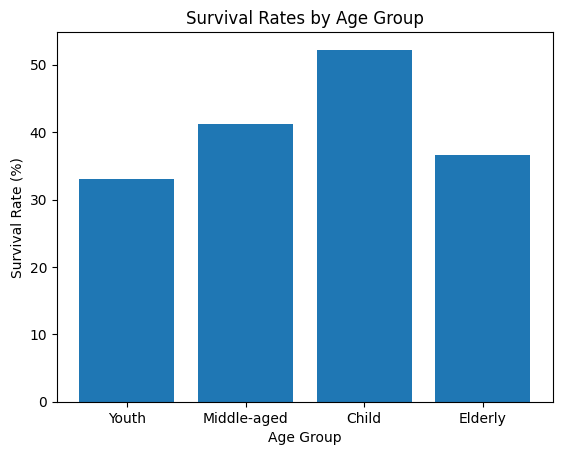

In [58]:
# 创建柱状图
plt.bar(survival_rates.index, survival_rates.values)

# 设置图表标题和标签
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')

# 显示图表
plt.show()

In [40]:
# 【分析六】不同登船港口的乘客生存情况

In [71]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 对 Embarked 的缺失值进行处理
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 统计不同港口上船的乘客人数以及生还人数
embarked_count = df.groupby('Embarked')['PassengerId'].count()
survived_count = df.groupby('Embarked')['Survived'].sum()

# 计算不同港口上船的乘客生还率
survival_rate = survived_count / embarked_count

survival_rate

Embarked
C    0.561538
Q    0.333333
S    0.321293
dtype: float64

In [72]:
# 【分析六的可视化】使用柱状图表示不同登船港口的乘客生存情况

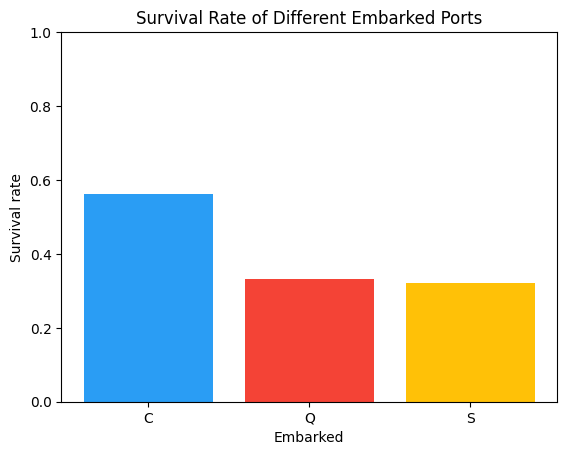

In [73]:
# 可视化结果
plt.bar(['C', 'Q', 'S'], survival_rate, color=['#2a9df4', '#f44336', '#ffc107'])
plt.xlabel('Embarked')
plt.ylabel('Survival rate')
plt.title('Survival Rate of Different Embarked Ports')
plt.ylim(0.0, 1.0)
plt.show()

In [75]:
# 【分析七】登船港口为C的男性和女性的生存情况

In [76]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 筛选登船港口为 C 的数据
embarked_c_df = df[df['Embarked'] == 'C']

# 统计登船港口为 C 的男性和女性生存情况
male_survived = embarked_c_df[(embarked_c_df['Sex'] == 'male') & (embarked_c_df['Survived'] == 1)]
female_survived = embarked_c_df[(embarked_c_df['Sex'] == 'female') & (embarked_c_df['Survived'] == 1)]

# 输出结果
print("登船港口为 C 的男性生存人数:", len(male_survived))
print("登船港口为 C 的女性生存人数:", len(female_survived))

登船港口为 C 的男性生存人数: 22
登船港口为 C 的女性生存人数: 51


In [77]:
# 【分析七的可视化】使用柱状图表示登船港口为C的男性和女性的生存情况

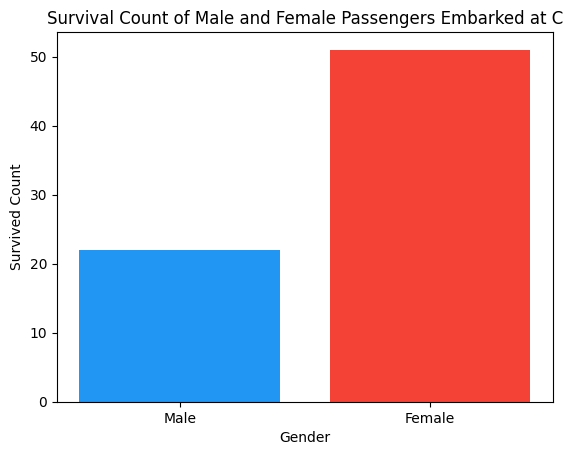

In [78]:
# 读取 train.csv 文件
df = pd.read_csv('train.csv')

# 筛选登船港口为 C 的数据
embarked_c_df = df[df['Embarked'] == 'C']

# 统计登船港口为 C 的男性和女性生存情况
male_survived = embarked_c_df[(embarked_c_df['Sex'] == 'male') & (embarked_c_df['Survived'] == 1)]
female_survived = embarked_c_df[(embarked_c_df['Sex'] == 'female') & (embarked_c_df['Survived'] == 1)]

# 可视化结果
labels = ['Male', 'Female']
survived_counts = [len(male_survived), len(female_survived)]

plt.bar(labels, survived_counts, color=['#2196f3', '#f44336'])
plt.xlabel('Gender')
plt.ylabel('Survived Count')
plt.title('Survival Count of Male and Female Passengers Embarked at C')
plt.show()